# Check R15107 files

In [8]:
import sys,os,os.path
sys.path.append("../../../../") # if you move files around, you need to adjust this!
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

In [9]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import pandas as pd
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio
from IC.invisible_cities.cities                 import beersheba as beerfun

from IC.invisible_cities.io.dst_io import load_dsts

from tqdm import tqdm

In [10]:
folder_path = '../../data/15107/sophronia/trigger2/ldc1/'
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
print(file_names)

['run_15107_0012_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0013_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0010_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0015_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0005_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0011_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0009_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0003_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0008_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0002_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0001_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0007_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0016_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_15107_0006_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'run_

In [11]:
# load in

full_dst = load_dsts([folder_path + x for x in file_names], 'RECO', 'Events')
display(full_dst)
print(f'Number of events: {full_dst.event.nunique()}')

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,8570,1.742935e+09,30,-151.630826,18.373069,1,104.275,-155.375,0.0,0.0,527.063000,5.068394,-7.550122,-1.0,-0.000021,-1,-1.0
1,8570,1.742935e+09,30,-151.630826,18.373069,1,-81.325,122.525,0.0,0.0,529.394500,6.378646,111.951553,-1.0,0.000305,-1,-1.0
2,8570,1.742935e+09,30,-151.630826,18.373069,1,-19.125,322.675,0.0,0.0,529.394500,5.152550,90.432353,-1.0,0.000256,-1,-1.0
3,8570,1.742935e+09,30,-151.630826,18.373069,1,-297.025,153.125,0.0,0.0,533.179125,7.022198,150.685082,-1.0,0.000427,-1,-1.0
4,8570,1.742935e+09,30,-151.630826,18.373069,1,-343.675,292.075,0.0,0.0,533.179125,5.748483,123.353204,-1.0,0.000402,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120523,674,1.742935e+09,25,38.743186,131.437557,1,10.975,414.975,0.0,0.0,970.261500,5.621337,3.056281,-1.0,0.000010,-1,-1.0
120524,674,1.742935e+09,25,38.743186,131.437557,1,-50.225,-247.675,0.0,0.0,972.601500,5.139459,3.968747,-1.0,0.000012,-1,-1.0
120525,674,1.742935e+09,25,38.743186,131.437557,1,57.625,-464.375,0.0,0.0,972.601500,5.033332,3.886794,-1.0,0.000014,-1,-1.0
120526,674,1.742935e+09,25,38.743186,131.437557,1,-126.975,260.475,0.0,0.0,976.143875,5.499087,-1.678771,-1.0,-0.000005,-1,-1.0


Number of events: 87


# lets plot a bunch

In [27]:
q_cut = 7
drop_dist       = [16, 16]
cut_sensors       = beerfun.cut_over_Q   (q_cut, ['E', 'Ec'])
drop_sensors      = beerfun.drop_isolated(drop_dist, ['E', 'Ec'])


1
1
2
5
8
24
27
38
45
49
53
56
63
59
57
62
62
53
56
54
45
40
37
28
30
22
22
16
9
9
3
3
5
2
1
1
1
1
2
1
2
2
1
1
3
3
2


Text(0, 0.5, 'nSiPMs')

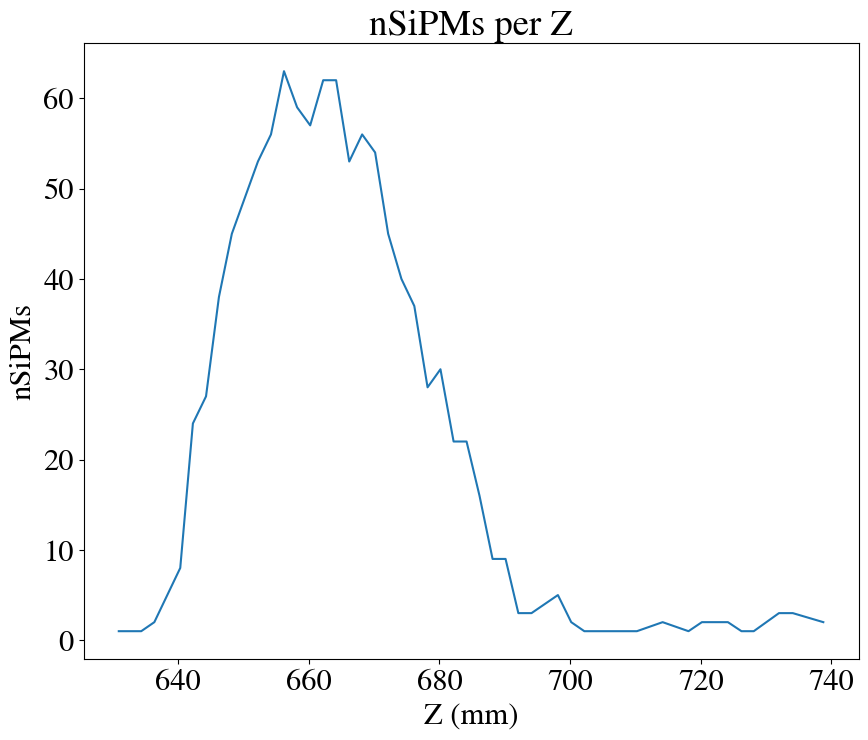

In [41]:
for z, df2 in df.groupby('Z'):
    #print(z)
    #display(df2)
    print(df2.nsipm.sum())

plt.plot(df.groupby('Z').sum().filter(like='nsipm'))
plt.title('nSiPMs per Z')
plt.xlabel('Z (mm)')
plt.ylabel('nSiPMs')

In [43]:
for i, df in tqdm(full_dst.groupby('event')):
    hits_cut = coref.timefunc(cut_sensors)(df.copy())
    hits_drop = coref.timefunc(drop_sensors)(hits_cut.copy())
    pitch = 15.55
    # then applying transformations to convert to 'SiPM outputs'
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))


    xx = np.arange(hits_drop.X.min(), hits_drop.X.max() + pitch, pitch)
    yy = np.arange(hits_drop.Y.min(), hits_drop.Y.max() + pitch, pitch)
    zz = hits_cut.Z.unique()

    axes[0].hist2d(hits_drop.X, hits_drop.Y, bins=[xx, yy], weights=hits_drop.Q, cmin=0.0001);
    axes[0].set_xlabel('X (mm)');
    axes[0].set_ylabel('Y (mm)');

    axes[1].hist2d(hits_drop.X, hits_drop.Z, bins=[xx, zz], weights=hits_drop.Q, cmin=0.0001);
    axes[1].set_xlabel('X (mm)');
    axes[1].set_ylabel('Z (mm)');


    axes[2].hist2d(hits_drop.Y, hits_drop.Z, bins=[yy, zz], weights=hits_drop.Q, cmin=0.0001);
    axes[2].set_xlabel('Y (mm)');
    axes[2].set_ylabel('Z (mm)');

    fig.suptitle('Processed Sensors Signal_' + str(i), fontsize=30)
    fig.savefig(f'plots/15107/hits/evt_{i}.png')
    plt.close(fig)


    # then extract the number of sipms per z slice for each also
    plt.plot(df.groupby('Z').sum().filter(like='nsipm'))
    plt.title(f'nSiPMs_per_Z_' + str(i), fontsize = 30)
    plt.xlabel('Z (mm)')
    plt.ylabel('nSiPMs')
    plt.savefig(f'plots/15107/nsipms/evt_{i}.png')
    plt.close()
    

  0%|          | 0/87 [00:00<?, ?it/s]

Time spent in cut_over_Q: 0.012312889099121094 s
Time spent in drop_isolated: 0.01594066619873047 s


  1%|          | 1/87 [00:00<00:30,  2.84it/s]

Time spent in cut_over_Q: 0.011516809463500977 s
Time spent in drop_isolated: 0.00875401496887207 s


  2%|▏         | 2/87 [00:00<00:24,  3.52it/s]

Time spent in cut_over_Q: 0.019709348678588867 s
Time spent in drop_isolated: 0.022823810577392578 s


  3%|▎         | 3/87 [00:00<00:25,  3.33it/s]

Time spent in cut_over_Q: 0.039895057678222656 s
Time spent in drop_isolated: 0.012499332427978516 s


  5%|▍         | 4/87 [00:01<00:27,  2.98it/s]

Time spent in cut_over_Q: 0.02223658561706543 s
Time spent in drop_isolated: 0.07843565940856934 s


  6%|▌         | 5/87 [00:01<00:30,  2.65it/s]

Time spent in cut_over_Q: 0.019657135009765625 s
Time spent in drop_isolated: 0.02051568031311035 s


  7%|▋         | 6/87 [00:02<00:31,  2.57it/s]

Time spent in cut_over_Q: 0.022525548934936523 s
Time spent in drop_isolated: 0.022649526596069336 s


  8%|▊         | 7/87 [00:02<00:29,  2.69it/s]

Time spent in cut_over_Q: 0.010069847106933594 s
Time spent in drop_isolated: 0.013087034225463867 s


  9%|▉         | 8/87 [00:02<00:28,  2.74it/s]

Time spent in cut_over_Q: 0.030109882354736328 s
Time spent in drop_isolated: 0.03244519233703613 s


 10%|█         | 9/87 [00:03<00:28,  2.71it/s]

Time spent in cut_over_Q: 0.02350616455078125 s
Time spent in drop_isolated: 0.029203414916992188 s


 11%|█▏        | 10/87 [00:03<00:27,  2.82it/s]

Time spent in cut_over_Q: 0.02671194076538086 s
Time spent in drop_isolated: 0.06533670425415039 s


 13%|█▎        | 11/87 [00:03<00:26,  2.85it/s]

Time spent in cut_over_Q: 0.03289914131164551 s
Time spent in drop_isolated: 0.03247332572937012 s


 14%|█▍        | 12/87 [00:04<00:27,  2.77it/s]

Time spent in cut_over_Q: 0.026718854904174805 s
Time spent in drop_isolated: 0.026536941528320312 s


 15%|█▍        | 13/87 [00:04<00:27,  2.65it/s]

Time spent in cut_over_Q: 0.011841773986816406 s
Time spent in drop_isolated: 0.016405820846557617 s


 16%|█▌        | 14/87 [00:05<00:27,  2.63it/s]

Time spent in cut_over_Q: 0.012041330337524414 s
Time spent in drop_isolated: 0.01270747184753418 s


 17%|█▋        | 15/87 [00:05<00:27,  2.66it/s]

Time spent in cut_over_Q: 0.0263674259185791 s
Time spent in drop_isolated: 0.030651330947875977 s


 18%|█▊        | 16/87 [00:05<00:27,  2.62it/s]

Time spent in cut_over_Q: 0.010168075561523438 s
Time spent in drop_isolated: 0.01332855224609375 s


 20%|█▉        | 17/87 [00:07<00:46,  1.52it/s]

Time spent in cut_over_Q: 0.014731884002685547 s
Time spent in drop_isolated: 0.016665220260620117 s


 21%|██        | 18/87 [00:07<00:37,  1.84it/s]

Time spent in cut_over_Q: 0.046854257583618164 s
Time spent in drop_isolated: 0.046491146087646484 s


 22%|██▏       | 19/87 [00:07<00:35,  1.94it/s]

Time spent in cut_over_Q: 0.014350652694702148 s
Time spent in drop_isolated: 0.026281356811523438 s


 23%|██▎       | 20/87 [00:08<00:32,  2.06it/s]

Time spent in cut_over_Q: 0.03733181953430176 s
Time spent in drop_isolated: 0.03196239471435547 s


 24%|██▍       | 21/87 [00:08<00:31,  2.11it/s]

Time spent in cut_over_Q: 0.05168914794921875 s
Time spent in drop_isolated: 0.04566669464111328 s


 25%|██▌       | 22/87 [00:09<00:30,  2.14it/s]

Time spent in cut_over_Q: 0.011727094650268555 s
Time spent in drop_isolated: 0.04428672790527344 s


 26%|██▋       | 23/87 [00:09<00:28,  2.23it/s]

Time spent in cut_over_Q: 0.012310028076171875 s
Time spent in drop_isolated: 0.036451101303100586 s


 28%|██▊       | 24/87 [00:09<00:27,  2.29it/s]

Time spent in cut_over_Q: 0.05570721626281738 s
Time spent in drop_isolated: 0.0967111587524414 s


 29%|██▊       | 25/87 [00:10<00:27,  2.25it/s]

Time spent in cut_over_Q: 0.00925445556640625 s
Time spent in drop_isolated: 0.011881113052368164 s


 30%|██▉       | 26/87 [00:10<00:25,  2.37it/s]

Time spent in cut_over_Q: 0.021975278854370117 s
Time spent in drop_isolated: 0.06748723983764648 s


 31%|███       | 27/87 [00:11<00:25,  2.37it/s]

Time spent in cut_over_Q: 0.04760241508483887 s
Time spent in drop_isolated: 0.036278486251831055 s


 32%|███▏      | 28/87 [00:11<00:24,  2.44it/s]

Time spent in cut_over_Q: 0.014146566390991211 s
Time spent in drop_isolated: 0.015864849090576172 s


 33%|███▎      | 29/87 [00:12<00:27,  2.11it/s]

Time spent in cut_over_Q: 0.014379501342773438 s
Time spent in drop_isolated: 0.011608123779296875 s


 34%|███▍      | 30/87 [00:12<00:23,  2.41it/s]

Time spent in cut_over_Q: 0.008420944213867188 s
Time spent in drop_isolated: 0.013667106628417969 s


 36%|███▌      | 31/87 [00:12<00:21,  2.64it/s]

Time spent in cut_over_Q: 0.04350996017456055 s
Time spent in drop_isolated: 0.049634456634521484 s


 37%|███▋      | 32/87 [00:13<00:23,  2.39it/s]

Time spent in cut_over_Q: 0.020069122314453125 s
Time spent in drop_isolated: 0.030197620391845703 s


 38%|███▊      | 33/87 [00:13<00:22,  2.39it/s]

Time spent in cut_over_Q: 0.012064456939697266 s
Time spent in drop_isolated: 0.0534060001373291 s


 39%|███▉      | 34/87 [00:14<00:22,  2.38it/s]

Time spent in cut_over_Q: 0.012442827224731445 s
Time spent in drop_isolated: 0.01988506317138672 s


 40%|████      | 35/87 [00:14<00:19,  2.65it/s]

Time spent in cut_over_Q: 0.01063990592956543 s
Time spent in drop_isolated: 0.00834202766418457 s


 41%|████▏     | 36/87 [00:14<00:17,  2.88it/s]

Time spent in cut_over_Q: 0.010335206985473633 s
Time spent in drop_isolated: 0.011873483657836914 s


 43%|████▎     | 37/87 [00:15<00:16,  3.03it/s]

Time spent in cut_over_Q: 0.03423285484313965 s
Time spent in drop_isolated: 0.05596637725830078 s


 44%|████▎     | 38/87 [00:15<00:16,  2.89it/s]

Time spent in cut_over_Q: 0.024399280548095703 s
Time spent in drop_isolated: 0.10034728050231934 s


 45%|████▍     | 39/87 [00:15<00:17,  2.74it/s]

Time spent in cut_over_Q: 0.03792142868041992 s
Time spent in drop_isolated: 0.030302762985229492 s


 46%|████▌     | 40/87 [00:16<00:17,  2.65it/s]

Time spent in cut_over_Q: 0.010589599609375 s
Time spent in drop_isolated: 0.00905919075012207 s


 47%|████▋     | 41/87 [00:16<00:16,  2.81it/s]

Time spent in cut_over_Q: 0.02424907684326172 s
Time spent in drop_isolated: 0.02812814712524414 s


 48%|████▊     | 42/87 [00:16<00:16,  2.80it/s]

Time spent in cut_over_Q: 0.011196374893188477 s
Time spent in drop_isolated: 0.009313821792602539 s


 49%|████▉     | 43/87 [00:17<00:15,  2.83it/s]

Time spent in cut_over_Q: 0.012601137161254883 s
Time spent in drop_isolated: 0.008392810821533203 s


 51%|█████     | 44/87 [00:17<00:14,  3.00it/s]

Time spent in cut_over_Q: 0.016101598739624023 s
Time spent in drop_isolated: 0.015094757080078125 s


 52%|█████▏    | 45/87 [00:18<00:19,  2.11it/s]

Time spent in cut_over_Q: 0.02240896224975586 s
Time spent in drop_isolated: 0.08595514297485352 s


 53%|█████▎    | 46/87 [00:18<00:18,  2.20it/s]

Time spent in cut_over_Q: 0.033930063247680664 s
Time spent in drop_isolated: 0.07510566711425781 s


 54%|█████▍    | 47/87 [00:19<00:18,  2.19it/s]

Time spent in cut_over_Q: 0.019956588745117188 s
Time spent in drop_isolated: 0.01716136932373047 s


 55%|█████▌    | 48/87 [00:19<00:16,  2.31it/s]

Time spent in cut_over_Q: 0.016655921936035156 s
Time spent in drop_isolated: 0.02465057373046875 s


 56%|█████▋    | 49/87 [00:19<00:15,  2.40it/s]

Time spent in cut_over_Q: 0.009428024291992188 s
Time spent in drop_isolated: 0.010663747787475586 s


 57%|█████▋    | 50/87 [00:20<00:14,  2.57it/s]

Time spent in cut_over_Q: 0.04728412628173828 s
Time spent in drop_isolated: 0.04093742370605469 s


 59%|█████▊    | 51/87 [00:20<00:14,  2.49it/s]

Time spent in cut_over_Q: 0.021706819534301758 s
Time spent in drop_isolated: 0.019022464752197266 s


 60%|█████▉    | 52/87 [00:21<00:13,  2.54it/s]

Time spent in cut_over_Q: 0.06122159957885742 s
Time spent in drop_isolated: 0.06880760192871094 s


 61%|██████    | 53/87 [00:21<00:13,  2.49it/s]

Time spent in cut_over_Q: 0.008340597152709961 s
Time spent in drop_isolated: 0.02597355842590332 s


 62%|██████▏   | 54/87 [00:21<00:12,  2.56it/s]

Time spent in cut_over_Q: 0.028158187866210938 s
Time spent in drop_isolated: 0.03145956993103027 s


 63%|██████▎   | 55/87 [00:22<00:11,  2.75it/s]

Time spent in cut_over_Q: 0.015882492065429688 s
Time spent in drop_isolated: 0.033330678939819336 s


 64%|██████▍   | 56/87 [00:22<00:11,  2.80it/s]

Time spent in cut_over_Q: 0.031846046447753906 s
Time spent in drop_isolated: 0.02536940574645996 s


 66%|██████▌   | 57/87 [00:22<00:11,  2.71it/s]

Time spent in cut_over_Q: 0.01527547836303711 s
Time spent in drop_isolated: 0.014870882034301758 s


 67%|██████▋   | 58/87 [00:23<00:10,  2.75it/s]

Time spent in cut_over_Q: 0.019791364669799805 s
Time spent in drop_isolated: 0.02952432632446289 s


 68%|██████▊   | 59/87 [00:23<00:10,  2.70it/s]

Time spent in cut_over_Q: 0.020299911499023438 s
Time spent in drop_isolated: 0.036309242248535156 s


 69%|██████▉   | 60/87 [00:24<00:10,  2.67it/s]

Time spent in cut_over_Q: 0.01843571662902832 s
Time spent in drop_isolated: 0.10492920875549316 s


 70%|███████   | 61/87 [00:24<00:10,  2.50it/s]

Time spent in cut_over_Q: 0.019626140594482422 s
Time spent in drop_isolated: 0.027396678924560547 s


 71%|███████▏  | 62/87 [00:24<00:09,  2.55it/s]

Time spent in cut_over_Q: 0.019447803497314453 s
Time spent in drop_isolated: 0.01910567283630371 s


 72%|███████▏  | 63/87 [00:25<00:09,  2.50it/s]

Time spent in cut_over_Q: 0.013601303100585938 s
Time spent in drop_isolated: 0.01578378677368164 s


 74%|███████▎  | 64/87 [00:26<00:12,  1.87it/s]

Time spent in cut_over_Q: 0.014464855194091797 s
Time spent in drop_isolated: 0.01632857322692871 s


 75%|███████▍  | 65/87 [00:26<00:10,  2.04it/s]

Time spent in cut_over_Q: 0.03567194938659668 s
Time spent in drop_isolated: 0.02725958824157715 s


 76%|███████▌  | 66/87 [00:27<00:10,  2.02it/s]

Time spent in cut_over_Q: 0.028733015060424805 s
Time spent in drop_isolated: 0.03281259536743164 s


 77%|███████▋  | 67/87 [00:27<00:09,  2.10it/s]

Time spent in cut_over_Q: 0.012203216552734375 s
Time spent in drop_isolated: 0.014822959899902344 s


 78%|███████▊  | 68/87 [00:27<00:07,  2.44it/s]

Time spent in cut_over_Q: 0.018749237060546875 s
Time spent in drop_isolated: 0.019423723220825195 s


 79%|███████▉  | 69/87 [00:28<00:07,  2.56it/s]

Time spent in cut_over_Q: 0.00984501838684082 s
Time spent in drop_isolated: 0.01891303062438965 s


 80%|████████  | 70/87 [00:28<00:05,  2.86it/s]

Time spent in cut_over_Q: 0.018941640853881836 s
Time spent in drop_isolated: 0.016897201538085938 s


 82%|████████▏ | 71/87 [00:28<00:05,  2.77it/s]

Time spent in cut_over_Q: 0.0210726261138916 s
Time spent in drop_isolated: 0.02610921859741211 s


 83%|████████▎ | 72/87 [00:29<00:05,  2.80it/s]

Time spent in cut_over_Q: 0.012411117553710938 s
Time spent in drop_isolated: 0.012621641159057617 s


 84%|████████▍ | 73/87 [00:29<00:04,  2.94it/s]

Time spent in cut_over_Q: 0.023279905319213867 s
Time spent in drop_isolated: 0.029091835021972656 s


 85%|████████▌ | 74/87 [00:29<00:04,  3.07it/s]

Time spent in cut_over_Q: 0.010278940200805664 s
Time spent in drop_isolated: 0.012244224548339844 s


 86%|████████▌ | 75/87 [00:29<00:03,  3.10it/s]

Time spent in cut_over_Q: 0.011171340942382812 s
Time spent in drop_isolated: 0.014456748962402344 s


 87%|████████▋ | 76/87 [00:30<00:04,  2.64it/s]

Time spent in cut_over_Q: 0.05823993682861328 s
Time spent in drop_isolated: 0.0846703052520752 s


 89%|████████▊ | 77/87 [00:30<00:04,  2.40it/s]

Time spent in cut_over_Q: 0.02436661720275879 s
Time spent in drop_isolated: 0.0265655517578125 s


 90%|████████▉ | 78/87 [00:31<00:03,  2.38it/s]

Time spent in cut_over_Q: 0.05254077911376953 s
Time spent in drop_isolated: 0.07266783714294434 s


 91%|█████████ | 79/87 [00:31<00:03,  2.36it/s]

Time spent in cut_over_Q: 0.009414196014404297 s
Time spent in drop_isolated: 0.028734683990478516 s


 92%|█████████▏| 80/87 [00:32<00:02,  2.62it/s]

Time spent in cut_over_Q: 0.016421079635620117 s
Time spent in drop_isolated: 0.07677483558654785 s


 93%|█████████▎| 81/87 [00:32<00:02,  2.70it/s]

Time spent in cut_over_Q: 0.011837482452392578 s
Time spent in drop_isolated: 0.011429309844970703 s


 94%|█████████▍| 82/87 [00:32<00:01,  2.85it/s]

Time spent in cut_over_Q: 0.011223554611206055 s
Time spent in drop_isolated: 0.009724855422973633 s


 95%|█████████▌| 83/87 [00:33<00:01,  2.92it/s]

Time spent in cut_over_Q: 0.027931690216064453 s
Time spent in drop_isolated: 0.032633304595947266 s


 97%|█████████▋| 84/87 [00:33<00:01,  2.74it/s]

Time spent in cut_over_Q: 0.009777069091796875 s
Time spent in drop_isolated: 0.011504173278808594 s


 98%|█████████▊| 85/87 [00:33<00:00,  2.89it/s]

Time spent in cut_over_Q: 0.01309061050415039 s
Time spent in drop_isolated: 0.042236328125 s


 99%|█████████▉| 86/87 [00:34<00:00,  2.97it/s]

Time spent in cut_over_Q: 0.009380102157592773 s
Time spent in drop_isolated: 0.02503681182861328 s


100%|██████████| 87/87 [00:34<00:00,  2.49it/s]


In [ ]:
dst = load_dsts([folder_path + x for x in file_names], 'DST', '')